## 3.2 Changing view angles
Here we will experiment with different sun and viewing angles using a couple of birch trees

In [3]:
from __future__ import print_function, division
import os
import numpy as np
import matplotlib.pyplot as plt
from run_start import *
from hips import hips2img
%matplotlib inline

## Changing view angle in <code><span style="background-color:lightgrey">camera/simple.camera</span></code>
Options that were changed to create the following example are:

<code>geometry.zenith</code> in the below example this has been modified to 70$^{\circ}$.

<code>geometry.lookAt</code> changes the centre of the image, here this has been changed to <code>[0, 3, 1.5]</code> (x, y, z)

<code>results.image</code> and <code>result.integral</code> were also updated to prevent previous experiments being over written

/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


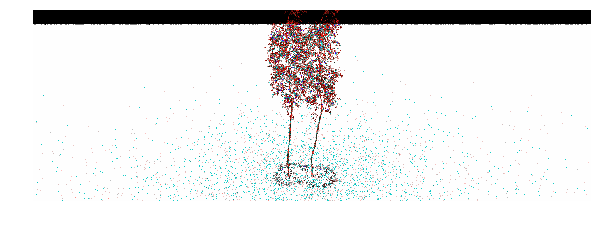

In [4]:
cmd = "echo 14 camera/camera_birches.dat light/light.dat | \
       start -v -RATm 5 -RATsensor_wavebands wb/waveband.dat obj/a_pair_of_birch_trees.obj"
error = run_start(cmd)

if not error:
    # here we create a false colour NIR image by reordering the bands, stretch is
    # therefore also turned off.
    hips2img('output/2birches.hips', stretch=False, order=[3, 1, 2])

## Changing illumination parameters in <code><span style="background-color:lightgrey">light/simple.light</span></code>

For an illumination source, azimuth and zenith geometry can be changed using the <code>geometry.zenith</code> and <code>geometry.aziumth</code> variables respectively. Below we generate two plots from azimuth angles of 0 and 180.

In [5]:
from generate_camera_file import update_existing_camera

/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in ver

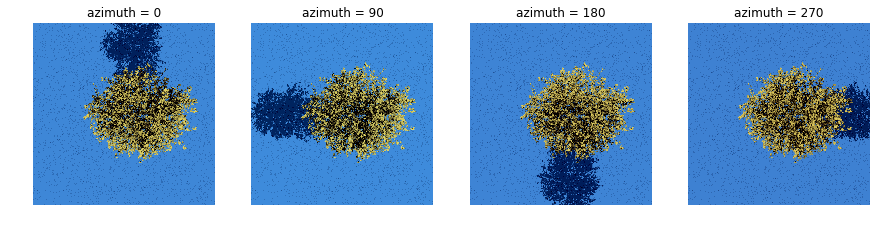

In [6]:
plt.figure(figsize=(15, 3.75))

camera_fname = 'camera/simple.camera'
light_fname = 'light/simple.light'

cmd = "echo 14 {} {} | \
       start -RATm 5 -RATsensor_wavebands \
       wb/waveband.dat obj/birch_tree_scene.obj"

for i, azimuth in enumerate([0, 90, 180, 270]):
    
    oname = 'output/azimuth.temp'
    im = update_existing_camera(camera_fname, 
                                camera_fname + '.temp',
                                oname=oname,
                                new_options={'geometry.idealArea':4})
    
    update_existing_camera(light_fname,
                           light_fname + '.temp',
                           new_options={'geometry.azimuth':azimuth,
                                        'geometry.zenith':20})
    
    error = run_start(cmd.format(camera_fname + '.temp', light_fname + '.temp'))
    
    if not error:
        ax = hips2img(oname + '.hips', stretch=True, ax=plt.subplot(1, 4, i+1), imshow=False)
        ax.set_title('azimuth = {}'.format(azimuth))